In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [3]:
df = data.copy()
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
# As RowNumber and CustomerId are not required in analysis, dropping them
cols_to_drop = ['RowNumber', 'CustomerId']
df.drop(cols_to_drop, axis = 1, inplace = True)

In [6]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9997,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [7]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

<Figure size 1500x2500 with 0 Axes>

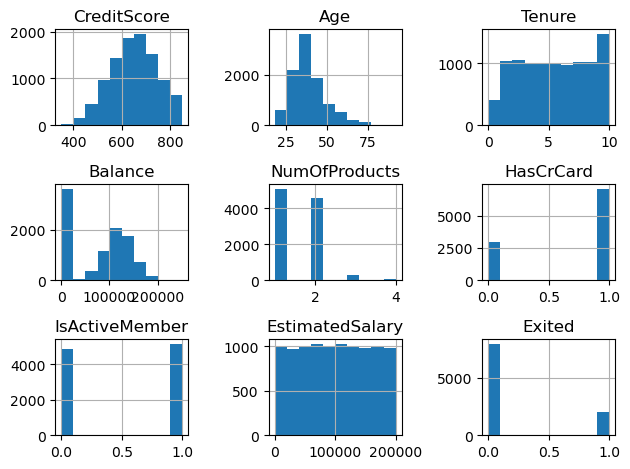

In [9]:
plt.figure(figsize = (15,25))

df.hist()
plt.tight_layout()

In [10]:
# The histogram shows us that:
# Majority of Customers have credit score between 600 and 700
# Majority of Customers are of ages between 35 and 40
# Majority have withdrew their money and their balance is zero
# Few have 3 and 4 products
# They have bought credit card
# There is not much difference between Active and non Active members, which shows they left the bank
# The customers didn't exited but they are not active members

In [11]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [12]:
# First of all, seeing customers that exited the bank and were not active

In [13]:
df_exit = df[(df.Exited==1) & (df.IsActiveMember==0)]
df_exit

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
5,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
16,Romeo,653,Germany,Male,58.0,1,132602.88,1,1.0,0.0,5097.67,1
22,Gerasimov,510,Spain,Female,38.0,4,0.00,1,1.0,0.0,118913.53,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9975,Smith,610,Germany,Male,50.0,1,113957.01,2,1.0,0.0,196526.55,1
9982,Griffin,655,Germany,Female,46.0,7,137145.12,1,1.0,0.0,115146.40,1
9991,Ajuluchukwu,597,France,Female,53.0,4,88381.21,1,1.0,0.0,69384.71,1
9998,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


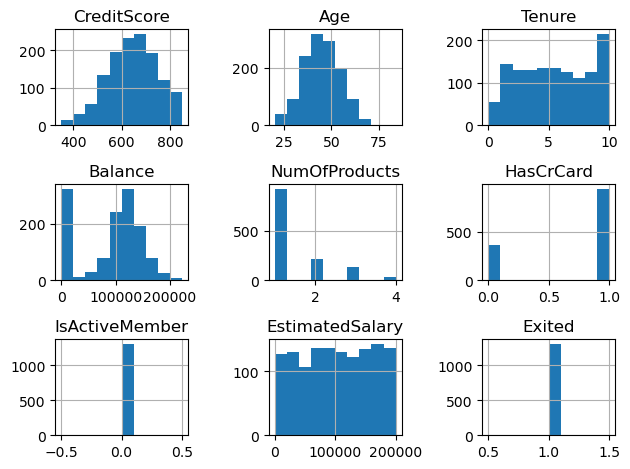

In [14]:
df_exit.hist()
plt.tight_layout()

In [15]:
df_exit.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.0,1303.000000,1303.0
mean,645.507291,44.877974,5.012279,90976.594114,1.442057,0.723715,0.0,101916.935695,1.0
std,101.738066,9.694552,2.933440,58241.508476,0.772698,0.447331,0.0,57913.112834,0.0
min,350.000000,20.000000,0.000000,0.000000,1.000000,0.000000,0.0,91.750000,1.0
25%,576.000000,38.500000,2.000000,35065.455000,1.000000,0.000000,0.0,53070.160000,1.0
50%,648.000000,45.000000,5.000000,109196.660000,1.000000,1.000000,0.0,102402.910000,1.0
75%,716.500000,51.000000,8.000000,131418.035000,2.000000,1.000000,0.0,152496.365000,1.0
max,850.000000,84.000000,10.000000,222267.630000,4.000000,1.000000,0.0,199725.390000,1.0


In [16]:
# We can see they had a good credit score and good salraies

In [17]:
# Now checking customers who exited but were active members

In [18]:
df_exit_ac = df[(df.Exited==1) & (df.IsActiveMember==1)]
df_exit_ac

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
46,Martin,829,Germany,Female,27.0,9,112045.67,1,1.0,1.0,119708.21,1
47,Okagbue,637,Germany,Female,39.0,9,137843.80,1,1.0,1.0,117622.80,1
90,Heap,647,Spain,Female,44.0,5,0.00,3,1.0,1.0,174205.22,1
104,Dunbabin,670,Spain,Female,65.0,1,0.00,1,1.0,1.0,177655.68,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9934,West,692,Germany,Female,43.0,10,118588.83,1,1.0,1.0,161241.65,1
9947,Abramovich,615,France,Male,34.0,1,83503.11,2,1.0,1.0,73124.53,1
9960,Lucciano,795,Germany,Female,33.0,9,104552.72,1,1.0,1.0,120853.83,1
9981,Burbidge,498,Germany,Male,42.0,3,152039.70,1,1.0,1.0,53445.17,1


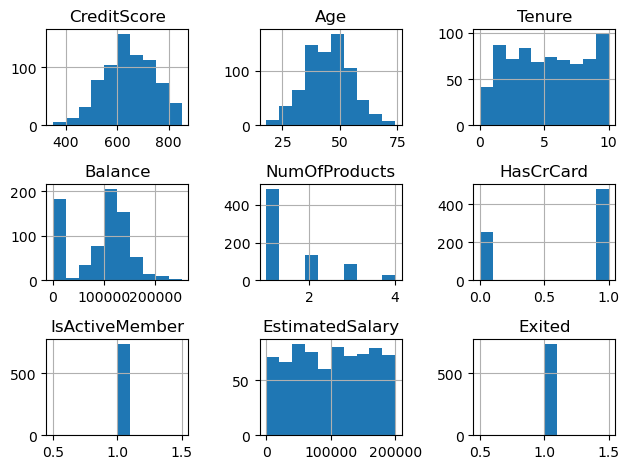

In [19]:
df_exit_ac.hist()
plt.tight_layout()

In [20]:
# We can see they also had a good credit score and ages were less than 50
# Number of products subscribed were 1
# Most of them didn't subscribed credit card
# There seems to be a problem with products. That bank is not giving a good product
# Because if products were good, they may have subscribed more products

In [21]:
# First of all let's check customers who exited the bank
df_exit_ac.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.0,735.000000,735.0
mean,645.247619,44.763265,4.789116,91320.636476,1.534694,0.655782,1.0,100654.022367,1.0
std,97.869686,9.879437,2.936270,58574.133553,0.847231,0.475436,0.0,57903.233747,0.0
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,1.0,11.580000,1.0
25%,581.000000,38.000000,2.000000,44441.750000,1.000000,0.000000,1.0,50543.215000,1.0
50%,644.000000,45.000000,5.000000,109922.610000,1.000000,1.000000,1.0,102517.830000,1.0
75%,715.500000,51.000000,7.000000,131393.860000,2.000000,1.000000,1.0,150677.920000,1.0
max,850.000000,74.000000,10.000000,250898.090000,4.000000,1.000000,1.0,199808.100000,1.0


In [22]:
# Now we donot have products data of the bank
# We can build a machine learning model to predict the exit to avoid future consequences

In [23]:
# Seeing at the histogram shows that salary and tenure are not effecting the exit
# Let's see with feature importance

In [24]:
df = df.drop("Surname", axis = 1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [25]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [26]:
df = df.replace({"Male":0, "Female":1})
df = pd.get_dummies(data = df, columns = ["Geography"])
df

C:\Users\Hizbullah Jadoon\AppData\Local\Temp\ipykernel_6928\64193400.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Male":0, "Female":1})


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42.0,2,0.00,1,1.0,1.0,101348.88,1,True,False,False
1,608,1,41.0,1,83807.86,1,0.0,1.0,112542.58,0,False,False,True
2,502,1,42.0,8,159660.80,3,1.0,0.0,113931.57,1,True,False,False
3,699,1,39.0,1,0.00,2,0.0,0.0,93826.63,0,True,False,False
4,850,1,43.0,2,125510.82,1,NaN,1.0,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,709,1,36.0,7,0.00,1,0.0,1.0,42085.58,1,True,False,False
9998,772,0,42.0,3,75075.31,2,1.0,0.0,92888.52,1,False,True,False
9999,772,0,42.0,3,75075.31,2,1.0,0.0,92888.52,1,False,True,False
10000,792,1,28.0,4,130142.79,1,1.0,0.0,38190.78,0,True,False,False


In [27]:
df = df.dropna()

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
X = df.drop("Exited",axis=1)
Y = df["Exited"]

In [30]:
# Splitting into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [31]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
yp = lr.predict(x_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
# Get feature importance
coefficients = lr.coef_[0]
feature_importance = np.abs(coefficients)
sorted_idx = np.argsort(feature_importance)[::-1]

# Print sorted feature importance
for idx in sorted_idx:
    print(f"Feature {X.columns[idx]}: Importance {feature_importance[idx]}")

Feature Tenure: Importance 0.08107253433503725
Feature IsActiveMember: Importance 0.05367317991120905
Feature Age: Importance 0.045070589537713424
Feature Geography_France: Importance 0.027972743390027
Feature Geography_Germany: Importance 0.02774418120754761
Feature NumOfProducts: Importance 0.022743015498061715
Feature Gender: Importance 0.021786109384732823
Feature Geography_Spain: Importance 0.012893197749606341
Feature HasCrCard: Importance 0.011885147383366589
Feature CreditScore: Importance 0.004468352645658822
Feature Balance: Importance 3.839869885301084e-06
Feature EstimatedSalary: Importance 8.990364564501656e-07


In [33]:
lr.score(x_test, y_test)

0.8025

C:\Users\Hizbullah Jadoon\AppData\Local\Temp\ipykernel_6928\392907687.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


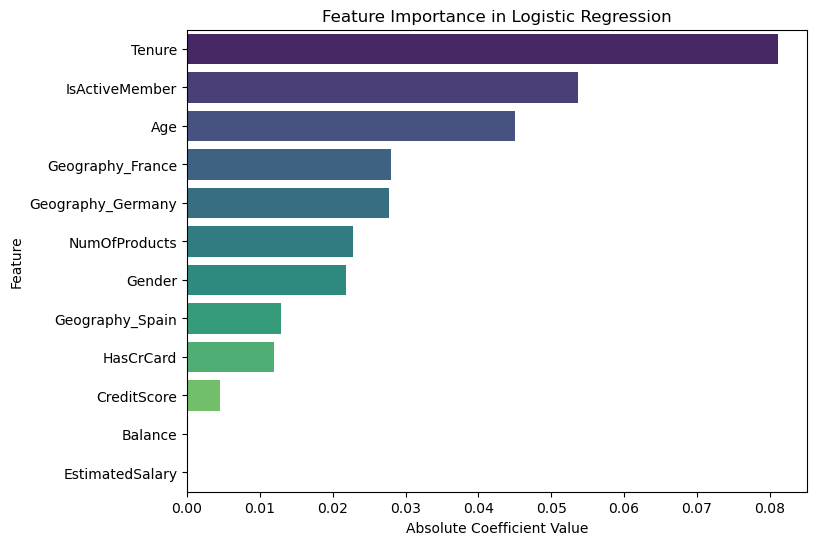

In [34]:
# Get coefficients and feature names
coefficients = lr.coef_[0]
feature_names = X.columns

# Create a DataFrame to store feature names and their corresponding importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)
})

# Sort the feature importance by value
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [35]:
# We can see that balance and estimated salary have no importance
# So, dropping them

In [36]:
df = df.drop(["Balance", "EstimatedSalary"], axis = 1)
df

,CreditScore,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42.0,2,1,1.0,1.0,1,True,False,False
1,608,1,41.0,1,1,0.0,1.0,0,False,False,True
2,502,1,42.0,8,3,1.0,0.0,1,True,False,False
3,699,1,39.0,1,2,0.0,0.0,0,True,False,False
5,645,0,44.0,8,2,1.0,0.0,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,1,36.0,7,1,0.0,1.0,1,True,False,False
9998,772,0,42.0,3,2,1.0,0.0,1,False,True,False
9999,772,0,42.0,3,2,1.0,0.0,1,False,True,False
10000,792,1,28.0,4,1,1.0,0.0,0,True,False,False


In [37]:
X = df.drop("Exited",axis=1)
Y = df["Exited"]
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [38]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
yp = lr.predict(x_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
lr.score(x_test, y_test)

0.8205

In [40]:
# We can see an increase in accuracy by 2%